# Baseline Results for Binary Classification (pain vs. no pain)

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa

from sklearn.model_selection import KFold
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate
from tensorflow.keras import Model

import sys
module_path = os.path.abspath(os.getcwd() + '\\..')
if module_path not in sys.path:
    sys.path.append(module_path)
from src.data.load_dataset import load_dataset, load_fusioned_dataset
from src.lib.DeepStack.deepstack.base import KerasMember
from src.lib.DeepStack.deepstack.ensemble import DirichletEnsemble

In [2]:
epochs, batch_size = 50, 32
kf = KFold(n_splits=3, shuffle=True, random_state=48)

results = []

early_stopping = tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=10,
        restore_best_weights=True,
    )

In [3]:
class Baseline():
    def __init__(self, n_features, n_length, n_outputs):
        input = Input(shape=(n_length, n_features))
        lstm = LSTM(50)(input)
        dense = Dense(50)(lstm)
        output = Dense(units=n_outputs, activation='sigmoid')(dense)
        model = Model(inputs=input, outputs=output)
        model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=n_outputs, average='macro')])
        self.model = model

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        history = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=2)
        return history

    def evaluate(self, X_test, y_test):
        results = self.model.evaluate(X_test, y_test, verbose=0)
        return results

    def predict(self, X_test):
        predictions = self.model.predict(X_test)
        return predictions

    def summary(self):
        self.model.summary()

## 1. Unimodal Body Modality (Skeleton)

### Dataset

In [4]:
X_train, X_test, y_train, y_test = load_dataset('skeleton', binary=True)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[3])
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[1], X_train.shape[-1], y_train.shape[1]

(783, 350, 35) (783, 1)
(274, 350, 35) (274, 1)


In [5]:
model = Baseline(n_features, n_length, n_outputs)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 35)]         0         
                                                                 
 lstm (LSTM)                 (None, 50)                17200     
                                                                 
 dense (Dense)               (None, 50)                2550      
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 19,801
Trainable params: 19,801
Non-trainable params: 0
_________________________________________________________________


### Baseline LSTM model

Epoch 1/50
17/17 - 4s - loss: 0.8185 - accuracy: 0.5134 - auc_1: 0.4375 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - f1_score: 0.6546 - val_loss: 0.7915 - val_accuracy: 0.5172 - val_auc_1: 0.4228 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.6512 - 4s/epoch - 223ms/step
Epoch 2/50
17/17 - 1s - loss: 0.7847 - accuracy: 0.5134 - auc_1: 0.4155 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - f1_score: 0.6546 - val_loss: 0.7631 - val_accuracy: 0.5172 - val_auc_1: 0.4209 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.6512 - 1s/epoch - 78ms/step
Epoch 3/50
17/17 - 1s - loss: 0.7559 - accuracy: 0.5134 - auc_1: 0.4330 - precision_1: 0.0000e+00 - recall_1: 0.0000e+00 - f1_score: 0.6546 - val_loss: 0.7370 - val_accuracy: 0.5172 - val_auc_1: 0.4522 - val_precision_1: 0.0000e+00 - val_recall_1: 0.0000e+00 - val_f1_score: 0.6512 - 1s/epoch - 80ms/step
Epoch 4/50
17/17 - 1s - loss: 0.7287 - accuracy: 0.5134 - auc_1: 0.4738 - precision_

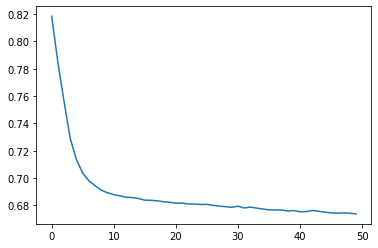

Epoch 1/50
17/17 - 4s - loss: 0.7628 - accuracy: 0.5364 - auc_2: 0.4348 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - f1_score: 0.6317 - val_loss: 0.7719 - val_accuracy: 0.4674 - val_auc_2: 0.5078 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_score: 0.6950 - 4s/epoch - 213ms/step
Epoch 2/50
17/17 - 1s - loss: 0.7095 - accuracy: 0.5383 - auc_2: 0.5072 - precision_2: 0.0000e+00 - recall_2: 0.0000e+00 - f1_score: 0.6317 - val_loss: 0.7346 - val_accuracy: 0.4636 - val_auc_2: 0.5216 - val_precision_2: 0.0000e+00 - val_recall_2: 0.0000e+00 - val_f1_score: 0.6950 - 1s/epoch - 79ms/step
Epoch 3/50
17/17 - 1s - loss: 0.6931 - accuracy: 0.5460 - auc_2: 0.5350 - precision_2: 0.7500 - recall_2: 0.0249 - f1_score: 0.6317 - val_loss: 0.7133 - val_accuracy: 0.4751 - val_auc_2: 0.5180 - val_precision_2: 0.5833 - val_recall_2: 0.0504 - val_f1_score: 0.6950 - 1s/epoch - 79ms/step
Epoch 4/50
17/17 - 1s - loss: 0.6856 - accuracy: 0.5479 - auc_2: 0.5593 - precision_2: 0.6087 - reca

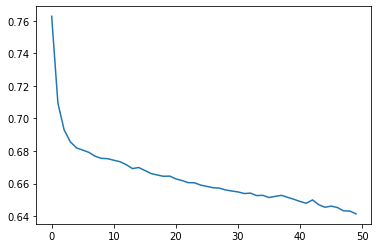

Epoch 1/50
17/17 - 3s - loss: 0.7477 - accuracy: 0.4425 - auc_3: 0.4466 - precision_3: 0.4261 - recall_3: 0.2830 - f1_score: 0.6734 - val_loss: 0.7330 - val_accuracy: 0.4713 - val_auc_3: 0.4351 - val_precision_3: 0.3964 - val_recall_3: 0.3826 - val_f1_score: 0.6117 - 3s/epoch - 199ms/step
Epoch 2/50
17/17 - 1s - loss: 0.7179 - accuracy: 0.4751 - auc_3: 0.4723 - precision_3: 0.4816 - recall_3: 0.4453 - f1_score: 0.6734 - val_loss: 0.7309 - val_accuracy: 0.4291 - val_auc_3: 0.4264 - val_precision_3: 0.3851 - val_recall_3: 0.4957 - val_f1_score: 0.6117 - 1s/epoch - 83ms/step
Epoch 3/50
17/17 - 1s - loss: 0.7092 - accuracy: 0.4828 - auc_3: 0.4864 - precision_3: 0.4911 - recall_3: 0.5208 - f1_score: 0.6734 - val_loss: 0.7259 - val_accuracy: 0.4406 - val_auc_3: 0.4402 - val_precision_3: 0.3960 - val_recall_3: 0.5130 - val_f1_score: 0.6117 - 1s/epoch - 78ms/step
Epoch 4/50
17/17 - 1s - loss: 0.6964 - accuracy: 0.5172 - auc_3: 0.5255 - precision_3: 0.5231 - recall_3: 0.5547 - f1_score: 0.6734 

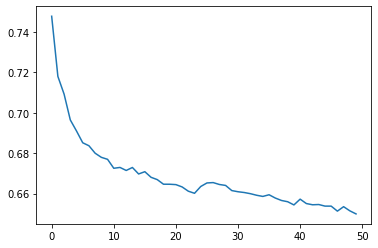

In [6]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    baseline_body_model = Baseline(n_features, n_length, n_outputs)
    history = baseline_body_model.train(X_train, y_train, X_val, y_val, epochs, batch_size)
    plt.plot(history.history['loss'])
    plt.show()

#### Predictions on the holdout set

In [7]:
y_pred = baseline_body_model.predict(X_test)
_, acc, auc, precision, recall, f1 = baseline_body_model.evaluate(X_test, y_test)
results.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

Accuracy: 67.15% 
ROC/AUC: 0.63 
Precision: 0.88 
Recall: 0.71 
F1 score: 0.92


## 2. Unimodal Face Modality (Action Units + Head Pose)

### Dataset

In [8]:
X_train, X_test, y_train, y_test = load_dataset('AUs', binary=True)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[3])
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[1], X_train.shape[-1], y_train.shape[1]

(752, 350, 25) (752, 1)
(268, 350, 25) (268, 1)


In [9]:
model = Baseline(n_features, n_length, n_outputs)
model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 350, 25)]         0         
                                                                 
 lstm_4 (LSTM)               (None, 50)                15200     
                                                                 
 dense_8 (Dense)             (None, 50)                2550      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 17,801
Trainable params: 17,801
Non-trainable params: 0
_________________________________________________________________


### Baseline LSTM model

Epoch 1/50
16/16 - 3s - loss: 0.7028 - accuracy: 0.5150 - auc_5: 0.4931 - precision_5: 0.4000 - recall_5: 0.0083 - f1_score: 0.6514 - val_loss: 0.6987 - val_accuracy: 0.5020 - val_auc_5: 0.5441 - val_precision_5: 0.3333 - val_recall_5: 0.0081 - val_f1_score: 0.6613 - 3s/epoch - 216ms/step
Epoch 2/50
16/16 - 1s - loss: 0.6962 - accuracy: 0.5090 - auc_5: 0.5306 - precision_5: 0.3333 - recall_5: 0.0165 - f1_score: 0.6514 - val_loss: 0.6938 - val_accuracy: 0.5020 - val_auc_5: 0.5445 - val_precision_5: 0.4000 - val_recall_5: 0.0161 - val_f1_score: 0.6613 - 1s/epoch - 81ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6923 - accuracy: 0.5130 - auc_5: 0.5346 - precision_5: 0.4545 - recall_5: 0.0413 - f1_score: 0.6514 - val_loss: 0.6896 - val_accuracy: 0.5139 - val_auc_5: 0.5570 - val_precision_5: 0.5312 - val_recall_5: 0.1371 - val_f1_score: 0.6613 - 1s/epoch - 79ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6880 - accuracy: 0.5070 - auc_5: 0.5619 - precision_5: 0.4510 - recall_5: 0.0950 - f1_score: 0.6514 

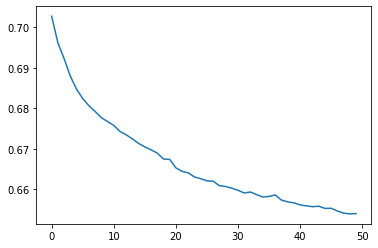

Epoch 1/50
16/16 - 3s - loss: 0.7137 - accuracy: 0.5230 - auc_6: 0.4835 - precision_6: 0.6429 - recall_6: 0.0370 - f1_score: 0.6532 - val_loss: 0.7198 - val_accuracy: 0.5020 - val_auc_6: 0.3861 - val_precision_6: 0.4286 - val_recall_6: 0.0488 - val_f1_score: 0.6578 - 3s/epoch - 205ms/step
Epoch 2/50
16/16 - 1s - loss: 0.7002 - accuracy: 0.5369 - auc_6: 0.4852 - precision_6: 0.6774 - recall_6: 0.0864 - f1_score: 0.6532 - val_loss: 0.7106 - val_accuracy: 0.5219 - val_auc_6: 0.3876 - val_precision_6: 0.5789 - val_recall_6: 0.0894 - val_f1_score: 0.6578 - 1s/epoch - 81ms/step
Epoch 3/50
16/16 - 2s - loss: 0.6938 - accuracy: 0.5409 - auc_6: 0.4873 - precision_6: 0.6327 - recall_6: 0.1276 - f1_score: 0.6532 - val_loss: 0.7054 - val_accuracy: 0.5139 - val_auc_6: 0.3962 - val_precision_6: 0.5152 - val_recall_6: 0.1382 - val_f1_score: 0.6578 - 2s/epoch - 95ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6894 - accuracy: 0.5569 - auc_6: 0.4927 - precision_6: 0.6105 - recall_6: 0.2387 - f1_score: 0.6532 

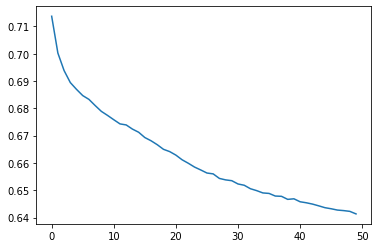

Epoch 1/50
16/16 - 4s - loss: 0.6738 - accuracy: 0.5936 - auc_7: 0.6117 - precision_7: 0.5771 - recall_7: 0.6518 - f1_score: 0.6595 - val_loss: 0.6843 - val_accuracy: 0.5560 - val_auc_7: 0.5872 - val_precision_7: 0.5299 - val_recall_7: 0.5966 - val_f1_score: 0.6450 - 4s/epoch - 258ms/step
Epoch 2/50
16/16 - 2s - loss: 0.6709 - accuracy: 0.5976 - auc_7: 0.6206 - precision_7: 0.5812 - recall_7: 0.6518 - f1_score: 0.6595 - val_loss: 0.6843 - val_accuracy: 0.5600 - val_auc_7: 0.5814 - val_precision_7: 0.5338 - val_recall_7: 0.5966 - val_f1_score: 0.6450 - 2s/epoch - 108ms/step
Epoch 3/50
16/16 - 2s - loss: 0.6697 - accuracy: 0.5976 - auc_7: 0.6247 - precision_7: 0.5818 - recall_7: 0.6478 - f1_score: 0.6595 - val_loss: 0.6838 - val_accuracy: 0.5560 - val_auc_7: 0.5794 - val_precision_7: 0.5299 - val_recall_7: 0.5966 - val_f1_score: 0.6450 - 2s/epoch - 110ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6708 - accuracy: 0.5916 - auc_7: 0.6216 - precision_7: 0.5750 - recall_7: 0.6518 - f1_score: 0.659

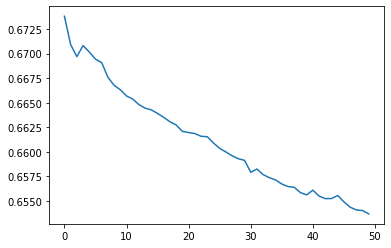

In [10]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    baseline_face_model = Baseline(n_features, n_length, n_outputs)
    history = baseline_face_model.train(X_train, y_train, X_val, y_val, epochs=epochs, batch_size=batch_size)
    plt.plot(history.history['loss'])
    plt.show()

#### Prediction on the holdout set

In [11]:
y_pred = baseline_face_model.predict(X_test)
_, acc, auc, precision, recall, f1 = baseline_face_model.evaluate(X_test, y_test)
results.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

Accuracy: 63.43% 
ROC/AUC: 0.65 
Precision: 0.92 
Recall: 0.63 
F1 score: 0.93


## 3. Multimodal Early Fusion

### Dataset

In [12]:
X_train, X_test, y_train, y_test = load_fusioned_dataset(binary=True)
X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], X_train.shape[3])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], X_test.shape[3])
X = X_train.copy()
y = y_train.copy()

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

n_length, n_features, n_outputs = X_train.shape[1], X_train.shape[-1], y_train.shape[1]

(752, 350, 60) (752, 1)
(268, 350, 60) (268, 1)


In [13]:
model = Baseline(n_features, n_length, n_outputs)
model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 350, 60)]         0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                22200     
                                                                 
 dense_16 (Dense)            (None, 50)                2550      
                                                                 
 dense_17 (Dense)            (None, 1)                 51        
                                                                 
Total params: 24,801
Trainable params: 24,801
Non-trainable params: 0
_________________________________________________________________


### CNN + Bidirectional LSTM

Epoch 1/50
16/16 - 4s - loss: 0.6891 - accuracy: 0.5250 - auc_9: 0.5557 - precision_9: 0.5110 - recall_9: 0.3843 - f1_score: 0.6514 - val_loss: 0.6822 - val_accuracy: 0.5299 - val_auc_9: 0.5668 - val_precision_9: 0.5375 - val_recall_9: 0.3468 - val_f1_score: 0.6613 - 4s/epoch - 231ms/step
Epoch 2/50
16/16 - 1s - loss: 0.6797 - accuracy: 0.5649 - auc_9: 0.5937 - precision_9: 0.5750 - recall_9: 0.3802 - f1_score: 0.6514 - val_loss: 0.6784 - val_accuracy: 0.5817 - val_auc_9: 0.5850 - val_precision_9: 0.6462 - val_recall_9: 0.3387 - val_f1_score: 0.6613 - 1s/epoch - 82ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6731 - accuracy: 0.5768 - auc_9: 0.6193 - precision_9: 0.6000 - recall_9: 0.3719 - f1_score: 0.6514 - val_loss: 0.6761 - val_accuracy: 0.5618 - val_auc_9: 0.5948 - val_precision_9: 0.6029 - val_recall_9: 0.3306 - val_f1_score: 0.6613 - 1s/epoch - 85ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6690 - accuracy: 0.5908 - auc_9: 0.6386 - precision_9: 0.6121 - recall_9: 0.4174 - f1_score: 0.6514 

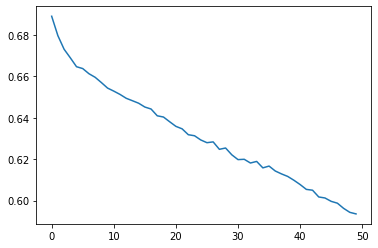

Epoch 1/50
16/16 - 4s - loss: 0.6799 - accuracy: 0.5569 - auc_10: 0.6080 - precision_10: 0.6129 - recall_10: 0.2346 - f1_score: 0.6532 - val_loss: 0.6979 - val_accuracy: 0.4900 - val_auc_10: 0.5558 - val_precision_10: 0.4510 - val_recall_10: 0.1870 - val_f1_score: 0.6578 - 4s/epoch - 240ms/step
Epoch 2/50
16/16 - 1s - loss: 0.6706 - accuracy: 0.5788 - auc_10: 0.6262 - precision_10: 0.6194 - recall_10: 0.3416 - f1_score: 0.6532 - val_loss: 0.6952 - val_accuracy: 0.5378 - val_auc_10: 0.5620 - val_precision_10: 0.5493 - val_recall_10: 0.3171 - val_f1_score: 0.6578 - 1s/epoch - 82ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6672 - accuracy: 0.5968 - auc_10: 0.6342 - precision_10: 0.6340 - recall_10: 0.3992 - f1_score: 0.6532 - val_loss: 0.6929 - val_accuracy: 0.5299 - val_auc_10: 0.5689 - val_precision_10: 0.5342 - val_recall_10: 0.3171 - val_f1_score: 0.6578 - 1s/epoch - 83ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6640 - accuracy: 0.6028 - auc_10: 0.6401 - precision_10: 0.6358 - recall_10: 0.423

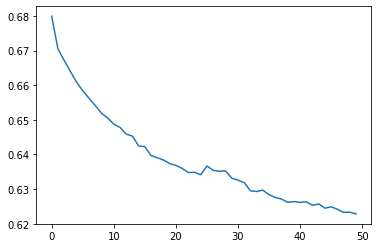

Epoch 1/50
16/16 - 4s - loss: 0.7186 - accuracy: 0.5040 - auc_11: 0.4241 - precision_11: 0.4762 - recall_11: 0.0810 - f1_score: 0.6595 - val_loss: 0.6961 - val_accuracy: 0.5240 - val_auc_11: 0.5161 - val_precision_11: 0.5000 - val_recall_11: 0.1176 - val_f1_score: 0.6450 - 4s/epoch - 231ms/step
Epoch 2/50
16/16 - 1s - loss: 0.7052 - accuracy: 0.5040 - auc_11: 0.4739 - precision_11: 0.4844 - recall_11: 0.1255 - f1_score: 0.6595 - val_loss: 0.6926 - val_accuracy: 0.5280 - val_auc_11: 0.5188 - val_precision_11: 0.5102 - val_recall_11: 0.2101 - val_f1_score: 0.6450 - 1s/epoch - 84ms/step
Epoch 3/50
16/16 - 1s - loss: 0.6989 - accuracy: 0.5199 - auc_11: 0.4899 - precision_11: 0.5273 - recall_11: 0.2348 - f1_score: 0.6595 - val_loss: 0.6899 - val_accuracy: 0.5360 - val_auc_11: 0.5347 - val_precision_11: 0.5217 - val_recall_11: 0.3025 - val_f1_score: 0.6450 - 1s/epoch - 84ms/step
Epoch 4/50
16/16 - 1s - loss: 0.6965 - accuracy: 0.5000 - auc_11: 0.4931 - precision_11: 0.4863 - recall_11: 0.287

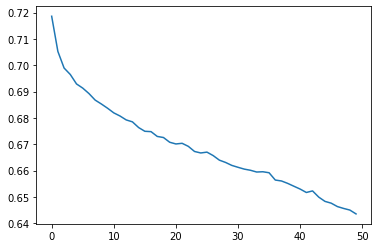

In [14]:
for train_index, val_index in kf.split(X):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    baseline_early_model = Baseline(n_features, n_length, n_outputs)
    history = baseline_early_model.train(X_train, y_train, X_val, y_val, epochs, batch_size)
    plt.plot(history.history['loss'])
    plt.show()

#### Prediction on the holdout set

In [15]:
y_pred = baseline_early_model.predict(X_test)
_, acc, auc, precision, recall, f1 = baseline_early_model.evaluate(X_test, y_test)
results.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

Accuracy: 47.76% 
ROC/AUC: 0.63 
Precision: 0.89 
Recall: 0.45 
F1 score: 0.93


## 4. Multimodal Late Fusion

### Dataset

In [16]:
body_X_train, body_X_test, body_y_train, body_y_test = load_dataset('skeleton', binary=True, fusion=True)
body_X_train = body_X_train.reshape(body_X_train.shape[0], body_X_train.shape[2], body_X_train.shape[3])
body_X_test = body_X_test.reshape(body_X_test.shape[0], body_X_test.shape[2], body_X_test.shape[3])
body_X = body_X_train.copy()
body_y = body_y_train.copy()

print(body_X_train.shape, body_y_train.shape)
print(body_X_test.shape, body_y_test.shape)

(752, 350, 35) (752, 1)
(268, 350, 35) (268, 1)


In [17]:
face_X_train, face_X_test, face_y_train, face_y_test = load_dataset('AUs', binary=True)
face_X_train = face_X_train.reshape(face_X_train.shape[0], face_X_train.shape[2], face_X_train.shape[3])
face_X_test = face_X_test.reshape(face_X_test.shape[0], face_X_test.shape[2], face_X_test.shape[3])
face_X = face_X_train.copy()
face_y = face_y_train.copy()

print(face_X_train.shape, face_y_train.shape)
print(face_X_test.shape, face_y_test.shape)

(752, 350, 25) (752, 1)
(268, 350, 25) (268, 1)


In [18]:
n_length, body_features, face_features, n_outputs = face_X_train.shape[1], body_X_train.shape[-1], face_X_train.shape[-1], body_y_train.shape[1]

### Baseline Model

In [19]:
class fusioned_Baseline():
    def __init__(self, body_features, face_features, n_length, n_outputs):
        input_1 = Input(shape=(n_length, body_features))
        lstm_1 = LSTM(50)(input_1)
        dense_1 = Dense(50)(lstm_1)

        input_2 = Input(shape=(n_length, face_features))
        lstm_2 = LSTM(50)(input_2)
        dense_2 = Dense(50)(lstm_2)

        concat = Concatenate()([dense_1, dense_2])
        output = Dense(units=n_outputs, activation='sigmoid')(concat)
        model = Model(inputs=[input_1, input_2], outputs=[output])
        model.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=n_outputs, average='macro')])
        self.model = model

    def train(self, body_X_train, face_X_train, y_train, body_X_val, face_X_val, y_val, epochs, batch_size):
        history = self.model.fit([body_X_train, face_X_train], y_train, validation_data=([body_X_val, face_X_val], y_val), 
                            epochs=epochs, batch_size=batch_size, verbose=2)
        return history

    def evaluate(self, body_X_test, face_X_test, y_test):
        results = self.model.evaluate([body_X_test, face_X_test], y_test, verbose=0)
        return results

    def predict(self, body_X_test, face_X_test):
        predictions = self.model.predict([body_X_test, face_X_test])
        return predictions

    def summary(self):
        self.model.summary()

In [20]:
model = fusioned_Baseline(body_features, face_features, n_length, n_outputs)
model.summary()

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 350, 35)]    0           []                               
                                                                                                  
 input_14 (InputLayer)          [(None, 350, 25)]    0           []                               
                                                                                                  
 lstm_12 (LSTM)                 (None, 50)           17200       ['input_13[0][0]']               
                                                                                                  
 lstm_13 (LSTM)                 (None, 50)           15200       ['input_14[0][0]']               
                                                                                           

### Baseline Model

Epoch 1/50
16/16 - 5s - loss: 0.6883 - accuracy: 0.5589 - auc_13: 0.5646 - precision_13: 0.5636 - recall_13: 0.3843 - f1_score: 0.6514 - val_loss: 0.6869 - val_accuracy: 0.5697 - val_auc_13: 0.5985 - val_precision_13: 0.5909 - val_recall_13: 0.4194 - val_f1_score: 0.6613 - 5s/epoch - 331ms/step
Epoch 2/50
16/16 - 2s - loss: 0.6762 - accuracy: 0.5808 - auc_13: 0.6015 - precision_13: 0.5964 - recall_13: 0.4091 - f1_score: 0.6514 - val_loss: 0.6883 - val_accuracy: 0.5697 - val_auc_13: 0.5955 - val_precision_13: 0.5833 - val_recall_13: 0.4516 - val_f1_score: 0.6613 - 2s/epoch - 106ms/step
Epoch 3/50
16/16 - 2s - loss: 0.6715 - accuracy: 0.5828 - auc_13: 0.6149 - precision_13: 0.5922 - recall_13: 0.4380 - f1_score: 0.6514 - val_loss: 0.6869 - val_accuracy: 0.5657 - val_auc_13: 0.5958 - val_precision_13: 0.5789 - val_recall_13: 0.4435 - val_f1_score: 0.6613 - 2s/epoch - 103ms/step
Epoch 4/50
16/16 - 2s - loss: 0.6686 - accuracy: 0.5848 - auc_13: 0.6245 - precision_13: 0.5966 - recall_13: 0.4

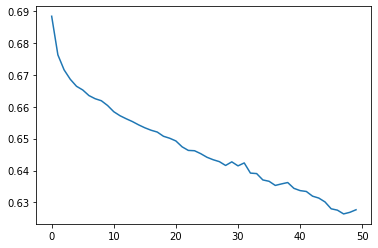

Epoch 1/50
16/16 - 5s - loss: 0.6932 - accuracy: 0.5329 - auc_14: 0.5265 - precision_14: 0.5266 - recall_14: 0.3663 - f1_score: 0.6532 - val_loss: 0.6820 - val_accuracy: 0.5737 - val_auc_14: 0.5806 - val_precision_14: 0.5769 - val_recall_14: 0.4878 - val_f1_score: 0.6578 - 5s/epoch - 327ms/step
Epoch 2/50
16/16 - 2s - loss: 0.6831 - accuracy: 0.5649 - auc_14: 0.5889 - precision_14: 0.5622 - recall_14: 0.4650 - f1_score: 0.6532 - val_loss: 0.6794 - val_accuracy: 0.5817 - val_auc_14: 0.5965 - val_precision_14: 0.5763 - val_recall_14: 0.5528 - val_f1_score: 0.6578 - 2s/epoch - 117ms/step
Epoch 3/50
16/16 - 2s - loss: 0.6791 - accuracy: 0.5689 - auc_14: 0.6067 - precision_14: 0.5616 - recall_14: 0.5062 - f1_score: 0.6532 - val_loss: 0.6750 - val_accuracy: 0.5896 - val_auc_14: 0.6146 - val_precision_14: 0.5893 - val_recall_14: 0.5366 - val_f1_score: 0.6578 - 2s/epoch - 117ms/step
Epoch 4/50
16/16 - 2s - loss: 0.6739 - accuracy: 0.5888 - auc_14: 0.6252 - precision_14: 0.5815 - recall_14: 0.5

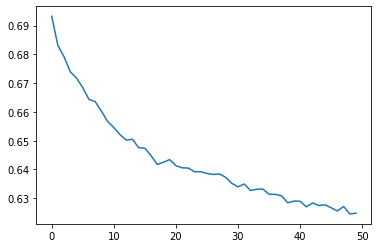

Epoch 1/50
16/16 - 6s - loss: 0.6987 - accuracy: 0.5020 - auc_15: 0.5087 - precision_15: 0.4956 - recall_15: 0.6883 - f1_score: 0.6595 - val_loss: 0.7002 - val_accuracy: 0.4960 - val_auc_15: 0.4826 - val_precision_15: 0.4755 - val_recall_15: 0.5714 - val_f1_score: 0.6450 - 6s/epoch - 370ms/step
Epoch 2/50
16/16 - 2s - loss: 0.6871 - accuracy: 0.5518 - auc_15: 0.5608 - precision_15: 0.5390 - recall_15: 0.6154 - f1_score: 0.6595 - val_loss: 0.7003 - val_accuracy: 0.5040 - val_auc_15: 0.4940 - val_precision_15: 0.4790 - val_recall_15: 0.4790 - val_f1_score: 0.6450 - 2s/epoch - 107ms/step
Epoch 3/50
16/16 - 2s - loss: 0.6833 - accuracy: 0.5398 - auc_15: 0.5741 - precision_15: 0.5360 - recall_15: 0.4818 - f1_score: 0.6595 - val_loss: 0.6951 - val_accuracy: 0.5400 - val_auc_15: 0.5212 - val_precision_15: 0.5196 - val_recall_15: 0.4454 - val_f1_score: 0.6450 - 2s/epoch - 106ms/step
Epoch 4/50
16/16 - 2s - loss: 0.6795 - accuracy: 0.5737 - auc_15: 0.5953 - precision_15: 0.5760 - recall_15: 0.5

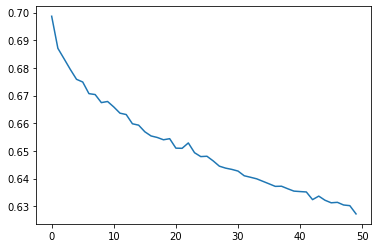

In [21]:
for train_index, val_index in kf.split(body_X):
    body_X_train, body_X_val = body_X[train_index], body_X[val_index]
    body_y_train, body_y_val = body_y[train_index], body_y[val_index]
    face_X_train, face_X_val = face_X[train_index], face_X[val_index]
    face_y_train, face_y_val = face_y[train_index], face_y[val_index]
    model = fusioned_Baseline(body_features, face_features, n_length, n_outputs)
    history = model.train(body_X_train, face_X_train, body_y_train, body_X_val, face_X_val, face_y_val, epochs, batch_size)
    plt.plot(history.history['loss'])
    plt.show()

#### Prediction on the holdout set

In [22]:
y_pred = model.predict(body_X_test, face_X_test)
_, acc, auc, precision, recall, f1 = model.evaluate(body_X_test, face_X_test, y_test)
results.append(round(auc, 2))
print('Accuracy: {:.2f}% \nROC/AUC: {:.2f} \nPrecision: {:.2f} \nRecall: {:.2f} \nF1 score: {:.2f}'.format(acc * 100, auc, precision, recall, f1))

Accuracy: 56.72% 
ROC/AUC: 0.69 
Precision: 0.93 
Recall: 0.54 
F1 score: 0.93


### Ensemble

In [23]:
baseline_body_member = KerasMember(name="Body Model", keras_model=baseline_body_model, train_batches=(body_X_train, y_train), val_batches=(body_X_test, body_y_test))
baseline_face_member = KerasMember(name="Face Model", keras_model=baseline_face_model, train_batches=(face_X_train, face_y_train), val_batches=(face_X_test, face_y_test))

In [24]:
dirichletEnsemble = DirichletEnsemble()
dirichletEnsemble.add_member(baseline_body_member)
dirichletEnsemble.add_member(baseline_face_member)
dirichletEnsemble.fit()

In [25]:
e = dirichletEnsemble.describe()
results.append(round(e, 2))

Body Model (weight: 0.5238)
Face Model (weight: 0.4762)
Accuracy: 100.00% - ROC/AUC: 0.66 - Precision: 1.00 - Recall: 1.00 - F1 score: 1.00


## Results

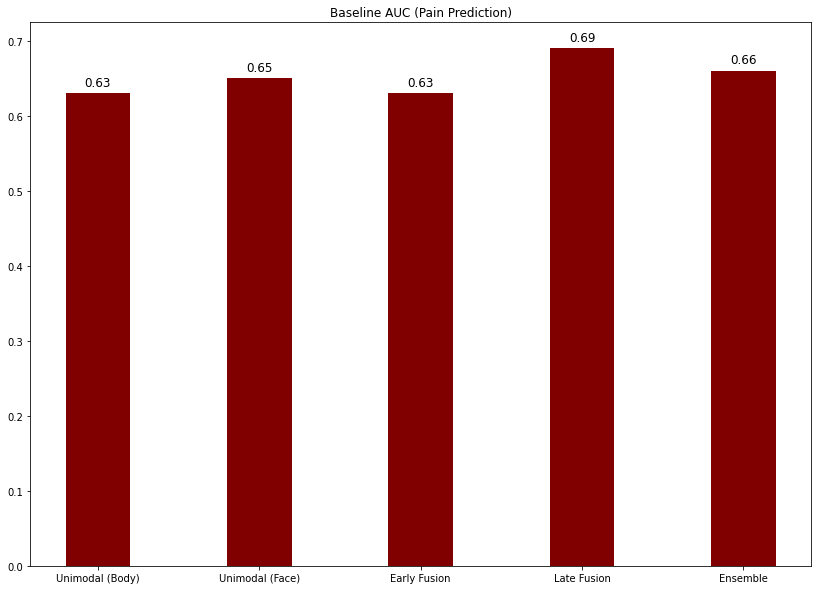

In [35]:
data = {'Unimodal (Body)':results[0], 'Unimodal (Face)':results[1], 'Early Fusion':results[2],
        'Late Fusion':results[3], 'Ensemble':results[4]}
models = list(data.keys())
performance = list(data.values())
  
fig = plt.figure(figsize = (14, 10))
 
plt.bar(models, performance, color ='maroon',
        width = 0.4)

plt.text(0, performance[0] + 0.01, performance[0], ha='center', fontsize=12)
plt.text(1, performance[1] + 0.01, performance[1], ha='center', fontsize=12)
plt.text(2, performance[2] + 0.01, performance[2], ha='center', fontsize=12)
plt.text(3, performance[3] + 0.01, performance[3], ha='center', fontsize=12)
plt.text(4, performance[4] + 0.01, performance[4], ha='center', fontsize=12)
 
plt.title("Baseline AUC (Pain Prediction)")
plt.show()